<a href="https://colab.research.google.com/github/CrisGiacomazzi/CNN-Lung-Project/blob/main/Lung_project_dec82024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Path to the uploaded zip file
zip_path = '/content/drive/MyDrive/Portfolio/CNN image/lung-disease-dataset.zip'
extract_to = '/mnt/data/lung-disease-dataset/'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

extracted_folders = os.listdir(extract_to + "Lung X-Ray Image/Lung X-Ray Image")
print("Folders extracted to:", extract_to)
print(extracted_folders)

Folders extracted to: /mnt/data/lung-disease-dataset/
['Viral Pneumonia', 'Normal', 'Lung_Opacity']


Prepare the dataset

In [28]:
# Set the directory containing the dataset

# Set the directory containing the dataset
data_dir = os.path.join(extract_to, "Lung X-Ray Image/Lung X-Ray Image")

# Prepare ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training and validation generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Shuffle should be False to keep the order consistent for evaluation
)

Found 2780 images belonging to 3 classes.
Found 695 images belonging to 3 classes.
Found 3475 images belonging to 3 classes.


Define the CNN model

In [29]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer matches number of classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [30]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.6149 - loss: 0.8114 - val_accuracy: 0.7223 - val_loss: 0.6652
Epoch 2/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8251 - loss: 0.4400 - val_accuracy: 0.8043 - val_loss: 0.4467
Epoch 3/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.8602 - loss: 0.3528 - val_accuracy: 0.8489 - val_loss: 0.3751
Epoch 4/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8762 - loss: 0.3091 - val_accuracy: 0.8748 - val_loss: 0.3044
Epoch 5/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.8951 - loss: 0.2666 - val_accuracy: 0.8892 - val_loss: 0.2757
Epoch 6/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9069 - loss: 0.2247 - val_accuracy: 0.8647 - val_loss: 0.2987
Epoch 7/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9277 - loss: 0.1889 - val_accuracy: 0.8791 - val_loss: 0.2655
Epoch 8/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.9341 - loss: 0.1675 - val_accuracy: 0.8460 - v

Save the model

In [31]:
model_path = '/mnt/data/cnn_model_lung_disease.h5'
model.save(model_path)
print(f"Model saved at: {model_path}")


Model saved at: /mnt/data/cnn_model_lung_disease.h5


Evaluate the model

In [32]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.8790 - loss: 0.6300
Validation Loss: 0.6056914329528809
Validation Accuracy: 0.8820143938064575
109/109 ━━━━━━━━━━━━━━━━━━━━ 54s 500ms/step - accuracy: 0.9112 - loss: 0.3936
Test Loss: 0.1518595814704895
Test Accuracy: 0.9634532332420349


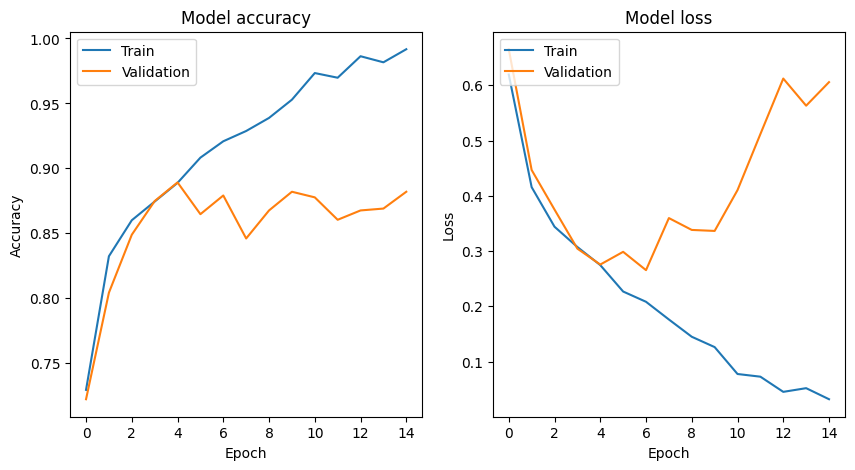

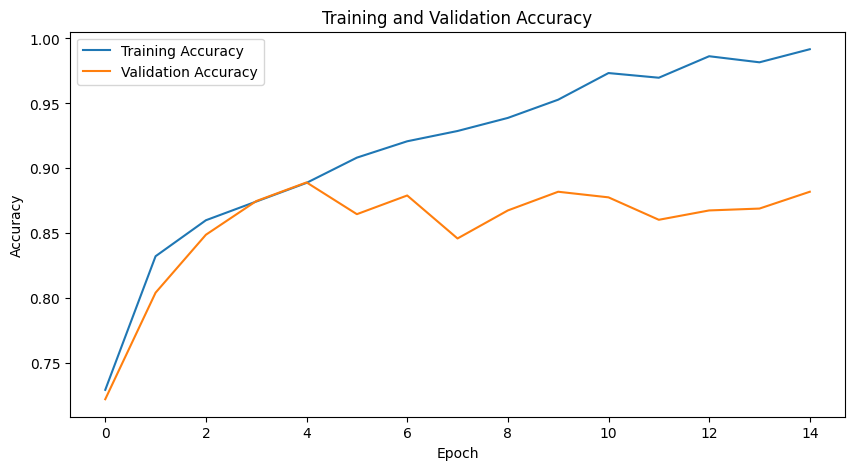

In [33]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot test & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Confusion Matrix

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Predictions

In [35]:
# Get true labels and predicted labels for the validation data
val_generator.reset()  # Ensure the generator starts from the beginning

# Predict probabilities for validation data
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step


Compute Matrix

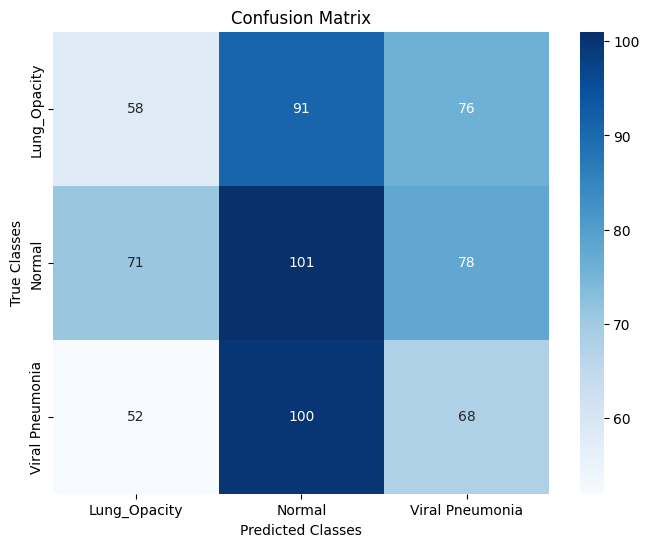

In [36]:
# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

Report

In [37]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
                 precision    recall  f1-score   support

   Lung_Opacity       0.32      0.26      0.29       225
         Normal       0.35      0.40      0.37       250
Viral Pneumonia       0.31      0.31      0.31       220

       accuracy                           0.33       695
      macro avg       0.32      0.32      0.32       695
   weighted avg       0.33      0.33      0.32       695

